In [1]:
import torch
from torch_geometric.data import Data
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./data/DT_File_MAP.xlsx')
df_ts = pd.read_csv('./data/[UNC]ADNI-network/dataTS.csv')

In [3]:

df_m = df[["Subject", "VISCODE"]].merge(df_ts, how = 'inner', left_on="Subject", right_on = "subject")
df_m['date']= pd.to_datetime(df_m['EXAMDATE.x'],format='%m/%d/%Y')

df_ms = df_m.sort_values(["PTID","date"])[["Subject","PTID","date","VISCODE_x", "VISCODE_y","DX_bl"]]


df_msl = df_ms[1:].reset_index(drop=True)

df_diff = df_msl.merge(df_ms, on = None,left_index= True,right_index=True, how = "right", suffixes=('_l','_e'))
df_diff



df_diff = df_diff[df_diff['PTID_l']==df_diff['PTID_e']]

df_diff = df_diff.reset_index(drop=True)

df_diff['interval_m'] = df_diff['VISCODE_x_l']-df_diff['VISCODE_x_e']
df_diff['interval_d'] = (df_diff['date_l']-df_diff['date_e']).dt.days

df_diff

,Subject_l,PTID_l,date_l,VISCODE_x_l,VISCODE_y_l,DX_bl_l,Subject_e,PTID_e,date_e,VISCODE_x_e,VISCODE_y_e,DX_bl_e,interval_m,interval_d
0,S185876,005_S_4910,2013-04-03,6.0,m06,AD,S177586,005_S_4910,2012-12-13,3,m03,AD,3.0,111
1,S184500,005_S_5038,2013-03-14,3.0,m03,AD,S177601,005_S_5038,2012-12-13,0,bl,AD,3.0,91
2,S191604,005_S_5038,2013-06-05,6.0,m06,AD,S184500,005_S_5038,2013-03-14,3,m03,AD,3.0,83
3,S209945,005_S_5038,2014-01-09,12.0,m12,AD,S191604,005_S_5038,2013-06-05,6,m06,AD,6.0,218
4,S193388,005_S_5119,2013-06-25,3.0,m03,AD,S185458,005_S_5119,2013-03-28,0,bl,AD,3.0,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,S349224,098_S_4275,2016-01-11,48.0,m48,CN,S211937,098_S_4275,2014-02-04,24,m24,CN,24.0,706
356,S155271,098_S_4506,2012-06-22,3.0,m03,CN,S141779,098_S_4506,2012-02-24,0,bl,CN,3.0,119
357,S167381,098_S_4506,2012-09-12,6.0,m06,CN,S155271,098_S_4506,2012-06-22,3,m03,CN,3.0,82
358,S197407,098_S_4506,2013-08-02,12.0,m12,CN,S167381,098_S_4506,2012-09-12,6,m06,CN,6.0,324


In [13]:
df_ms[df_ms['PTID'] == '129_S_4371']

,Subject,PTID,date,VISCODE_x,VISCODE_y,DX_bl
499,S206831,129_S_4371,2013-11-26,24,m24,CN


In [22]:
df_ms_base = df_ms.groupby("PTID").first()
df_ms_base[['Subject']]

,Subject
PTID,
005_S_4910,S177586
005_S_5038,S177601
005_S_5119,S185458
007_S_2394,S157440
007_S_4272,S148744
...,...
098_S_4201,S122170
098_S_4215,S121932
098_S_4275,S125682


In [18]:
df_ms_base.loc['005_S_4910']['Subject']

'S177586'

In [29]:
df_ms_base = df_ms.groupby("PTID").first()
df_ms_base = df_ms_base[['Subject']]
df_ms_base.columns = ['Subject_b']
df_diff = df_diff.merge(df_ms_base, left_on = 'PTID_l', right_on = 'PTID', how = 'inner')

,Subject_l,PTID_l,date_l,VISCODE_x_l,VISCODE_y_l,DX_bl_l,Subject_e,PTID_e,date_e,VISCODE_x_e,VISCODE_y_e,DX_bl_e,interval_m,interval_d,Subject_b
0,S185876,005_S_4910,2013-04-03,6.0,m06,AD,S177586,005_S_4910,2012-12-13,3,m03,AD,3.0,111,S177586
1,S184500,005_S_5038,2013-03-14,3.0,m03,AD,S177601,005_S_5038,2012-12-13,0,bl,AD,3.0,91,S177601
2,S191604,005_S_5038,2013-06-05,6.0,m06,AD,S184500,005_S_5038,2013-03-14,3,m03,AD,3.0,83,S177601
3,S209945,005_S_5038,2014-01-09,12.0,m12,AD,S191604,005_S_5038,2013-06-05,6,m06,AD,6.0,218,S177601
4,S193388,005_S_5119,2013-06-25,3.0,m03,AD,S185458,005_S_5119,2013-03-28,0,bl,AD,3.0,89,S185458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,S349224,098_S_4275,2016-01-11,48.0,m48,CN,S211937,098_S_4275,2014-02-04,24,m24,CN,24.0,706,S125682
356,S155271,098_S_4506,2012-06-22,3.0,m03,CN,S141779,098_S_4506,2012-02-24,0,bl,CN,3.0,119,S141779
357,S167381,098_S_4506,2012-09-12,6.0,m06,CN,S155271,098_S_4506,2012-06-22,3,m03,CN,3.0,82,S141779
358,S197407,098_S_4506,2013-08-02,12.0,m12,CN,S167381,098_S_4506,2012-09-12,6,m06,CN,6.0,324,S141779


In [30]:
df_diff.groupby('DX_bl_l').count()

,Subject_l,PTID_l,date_l,VISCODE_x_l,VISCODE_y_l,Subject_e,PTID_e,date_e,VISCODE_x_e,VISCODE_y_e,DX_bl_e,interval_m,interval_d
DX_bl_l,,,,,,,,,,,,,
AD,50,50,50,50,50,50,50,50,50,50,50,50,50
CN,79,79,79,79,79,79,79,79,79,79,79,79,79
EMCI,119,119,119,119,119,119,119,119,119,119,119,119,119
LMCI,73,73,73,73,73,73,73,73,73,73,73,73,73
SMC,39,39,39,39,39,39,39,39,39,39,39,39,39


In [31]:
79/(50+79)

0.6124031007751938

,Subject_l,Subject_e,DX_bl_e
0,S185876,S177586,AD
1,S184500,S177601,AD
2,S191604,S184500,AD
3,S209945,S191604,AD
4,S193388,S185458,AD
...,...,...,...
355,S349224,S211937,CN
356,S155271,S141779,CN
357,S167381,S155271,CN
358,S197407,S167381,CN


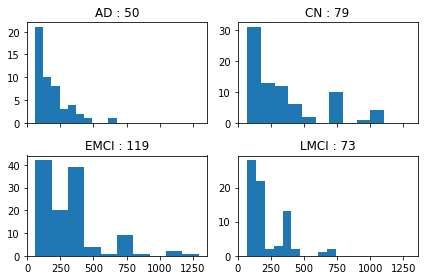

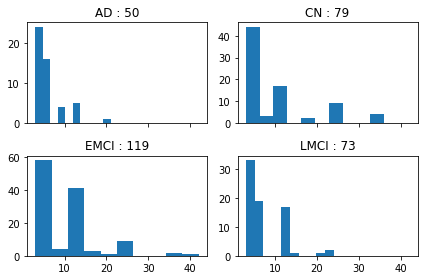

In [4]:
df_intervals_m = df_diff.groupby('DX_bl_e')['interval_m'].apply(list)
df_intervals_d = df_diff.groupby('DX_bl_e')['interval_d'].apply(list)





f,a = plt.subplots(2,2, sharex=True)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(df_intervals_d[idx])
    ax.set_title(df_intervals_d.index[idx] + ' : ' + str(len(df_intervals_d[idx])))
plt.tight_layout()

f,a = plt.subplots(2,2, sharex=True)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(df_intervals_m[idx])
    ax.set_title(df_intervals_m.index[idx] + ' : ' + str(len(df_intervals_m[idx])))
plt.tight_layout()
df_diff[(df_diff['DX_bl_e']=='AD') | (df_diff['DX_bl_e']=='CN')][['Subject_l', 'Subject_e', 'DX_bl_e']]

In [5]:
labels = {}
#labels['CN'] = 0
#labels['EMCI'] = 1
#labels['LMCI'] = 2
#labels['AD'] = 3
#labels['CN'] = 0
#labels['EMCI'] = 1
#labels['LMCI'] = 2
#labels['AD'] = 2
labels['CN'] = 0
labels['AD'] = 1

In [6]:
filepath_r = os.path.join(os.path.join(".","sparsifiaction"),"data")
filepath_r = "./sparsification/data"


In [8]:
data_dict = {}
datalist = []
for i in range(df.shape[0]):
    #print(df[df.index==i]["LABEL"].item())
    label = df.loc[i]["LABEL"]
    if (label not in labels.keys()):
        continue
    y = labels[label]
    filename = os.path.join(filepath_r, "%s_fdt_network_matrix_df.csv"%df[df.index==i]["Subject"].item())
    #print(filename)
    sbj = df.loc[i]['Subject']
    edge_table = pd.read_csv(filename, sep = "\t")
    edge_table = edge_table[["src", "trg", "nij"]]
    #print(edge_table)
    edge_index = torch.tensor(edge_table[["src", "trg"]].values).transpose(0,1)
    edge_attr = torch.tensor(edge_table[["nij"]].values, dtype=torch.float)
    #print(edge_index.size())
    #print(edge_attr.size())
           
    x = torch.tensor(df[df.index==i][["Node %d"%(i) for i in range(1,149)]].values,  dtype=torch.float).transpose(0,1)
    #x = torch.cat((x, torch.eye(148)), dim = 1)
    #print(x.size())
    data = Data(x=x, y=y, edge_index=edge_index, edge_attr=edge_attr)
    datalist.append(data)
    data_dict[sbj] = data
    #break

In [9]:
data_dict

{'S177586': Data(edge_attr=[1017, 1], edge_index=[2, 1017], x=[148, 1], y=1),
 'S185876': Data(edge_attr=[1060, 1], edge_index=[2, 1060], x=[148, 1], y=1),
 'S177601': Data(edge_attr=[1061, 1], edge_index=[2, 1061], x=[148, 1], y=1),
 'S184500': Data(edge_attr=[1094, 1], edge_index=[2, 1094], x=[148, 1], y=1),
 'S191604': Data(edge_attr=[1217, 1], edge_index=[2, 1217], x=[148, 1], y=1),
 'S209945': Data(edge_attr=[1210, 1], edge_index=[2, 1210], x=[148, 1], y=1),
 'S185458': Data(edge_attr=[1055, 1], edge_index=[2, 1055], x=[148, 1], y=1),
 'S193388': Data(edge_attr=[1264, 1], edge_index=[2, 1264], x=[148, 1], y=1),
 'S217193': Data(edge_attr=[1260, 1], edge_index=[2, 1260], x=[148, 1], y=1),
 'S142629': Data(edge_attr=[1205, 1], edge_index=[2, 1205], x=[148, 1], y=0),
 'S180549': Data(edge_attr=[1139, 1], edge_index=[2, 1139], x=[148, 1], y=0),
 'S214038': Data(edge_attr=[1210, 1], edge_index=[2, 1210], x=[148, 1], y=0),
 'S404468': Data(edge_attr=[1208, 1], edge_index=[2, 1208], x=[1

In [10]:
len(datalist)

185

In [11]:
188*0.8

150.4

In [12]:
def edge2mat(edge_index, edge_attr, n = 148):
    efn = edge_attr.shape[-1]
    mat = torch.zeros([n,n,efn])
    for eidx, ef in zip(edge_index.T,edge_attr):
        mat[eidx[0],eidx[1]] = ef
    return mat

def mat2edge(mat):
    n = mat.shape[0]
    efn = mat.shape[-1]
    edge_index = []
    edge_attr = []
    for i in range(n):
        for j in range(n):
            if mat[i,j] != torch.zeros(efn):
                edge_index.append([i, j])
                edge_attr.append(mat[i,j])
    edge_index = torch.tensor(edge_index).T
    edge_attr = torch.tensor(edge_attr).unsqueeze(-1)
    edge_attr.shape
    return (edge_index, edge_attr)

mat = edge2mat(datalist[0].edge_index, datalist[0].edge_attr)
ei, ea = mat2edge(mat)
s1 = set()
for i in datalist[0].edge_index.T.tolist():
    s1.add(tuple(i))
s2 = set()
for i in ei.T.tolist() :
    s2.add(tuple(i))
    
s1 == s2


True

In [14]:
datalist = []
for i in range(df_diff.shape[0]):
    #print(df_diff.loc[i]['DX_bl_e'])
    label = df_diff.loc[i]['DX_bl_e']
    if (label not in labels.keys()):
        continue
    y = labels[label]
    print(y)
    
    sbj_l = df_diff.loc[i]['Subject_l']
    sbj_e = df_diff.loc[i]['Subject_e']
    d_l = data_dict[sbj_l]
    d_e = data_dict[sbj_e]
    
    x_l = d_l.x
    edge_index_l = d_l.edge_index
    edge_attr_l =d_l.edge_attr
    
    x_e = d_e.x
    edge_index_e = d_e.edge_index
    edge_attr_e =d_e.edge_attr
    
    mat_l = edge2mat(edge_index_l, edge_attr_l)
    mat_e = edge2mat(edge_index_e, edge_attr_e)
    
    #print(mat_l.shape, mat_e.shape)
    #print(edge_attr_e.shape)
    mat = (mat_l+mat_e)/2.0
    
    edge_index, edge_attr =  mat2edge(mat)

    x = x_l-x_e
    x = torch.cat((x, torch.eye(148)), dim = 1)
    #print(x.size())
    data = Data(x=x, y=y, edge_index=edge_index, edge_attr=edge_attr)
    datalist.append(data)
    #break

1
1
1
1
1
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
1
1
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0


In [15]:
#dataset = datalist
train_len = int(len(datalist)*0.8)
torch.manual_seed(12345)
#dataset = dataset.shuffle()

#train_dataset = dataset[:train_len]
#test_dataset = dataset[train_len:]

train_dataset, test_dataset = torch.utils.data.random_split(datalist, [train_len, len(datalist) -train_len])

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 103
Number of test graphs: 26


In [17]:
from torch_geometric.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 32
Batch(batch=[4736], edge_attr=[42259, 1], edge_index=[2, 42259], x=[4736, 149], y=[32])

Step 2:
Number of graphs in the current batch: 32
Batch(batch=[4736], edge_attr=[42219, 1], edge_index=[2, 42219], x=[4736, 149], y=[32])

Step 3:
Number of graphs in the current batch: 32
Batch(batch=[4736], edge_attr=[42060, 1], edge_index=[2, 42060], x=[4736, 149], y=[32])

Step 4:
Number of graphs in the current batch: 7
Batch(batch=[1036], edge_attr=[9244, 1], edge_index=[2, 9244], x=[1036, 149], y=[7])



In [195]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool
from torch_geometric.nn import GlobalAttention

#num_node_features =  1
num_node_features =  149
#num_classes = 4
num_classes = 3
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(num_node_features, hidden_channels, add_self_loops = False)
        self.conv2 = GCNConv(hidden_channels, hidden_channels, add_self_loops = False)
        self.conv3 = GCNConv(hidden_channels, hidden_channels, add_self_loops = False)
        self.lin = Linear(hidden_channels, num_classes)

    def forward(self, x, edge_index, edge_attr, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index, edge_attr)
        x = x.relu()
        x = self.conv2(x, edge_index, edge_attr)
        x = x.relu()
        x = self.conv3(x, edge_index, edge_attr)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        
        return x

model = GCN(hidden_channels=64)
print(model)

GCN(
  (conv1): GCNConv(149, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=3, bias=True)
)


In [196]:
#from IPython.display import Javascript
#display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
        #print(data.x, data.edge_index, data.batch)
        out = model(data.x, data.edge_index,data.edge_attr, data.batch)  # Perform a single forward pass.
        loss = criterion(out, data.y)  # Compute the loss.
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
        optimizer.zero_grad()  # Clear gradients.

def test(loader):
    model.eval()

    correct = 0
    for data in loader:  # Iterate in batches over the training/test dataset.
        out = model(data.x, data.edge_index,data.edge_attr, data.batch)  
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        correct += int((pred == data.y).sum())  # Check against ground-truth labels.
    return correct / len(loader.dataset)  # Derive ratio of correct predictions.


for epoch in range(1, 201):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch: 001, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 002, Train Acc: 0.3828, Test Acc: 0.3846
Epoch: 003, Train Acc: 0.3828, Test Acc: 0.3846
Epoch: 004, Train Acc: 0.3828, Test Acc: 0.3846
Epoch: 005, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 006, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 007, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 008, Train Acc: 0.3828, Test Acc: 0.3846
Epoch: 009, Train Acc: 0.3867, Test Acc: 0.3385
Epoch: 010, Train Acc: 0.4141, Test Acc: 0.3385
Epoch: 011, Train Acc: 0.3828, Test Acc: 0.3846
Epoch: 012, Train Acc: 0.3867, Test Acc: 0.3231
Epoch: 013, Train Acc: 0.4258, Test Acc: 0.3692
Epoch: 014, Train Acc: 0.3828, Test Acc: 0.3846
Epoch: 015, Train Acc: 0.3945, Test Acc: 0.3692
Epoch: 016, Train Acc: 0.4141, Test Acc: 0.3846
Epoch: 017, Train Acc: 0.4180, Test Acc: 0.4154
Epoch: 018, Train Acc: 0.4414, Test Acc: 0.3538
Epoch: 019, Train Acc: 0.4609, Test Acc: 0.3692
Epoch: 020, Train Acc: 0.5312, Test Acc: 0.4462
Epoch: 021, Train Acc: 0.5547, Test Acc:

Epoch: 172, Train Acc: 1.0000, Test Acc: 0.7077
Epoch: 173, Train Acc: 1.0000, Test Acc: 0.7077
Epoch: 174, Train Acc: 1.0000, Test Acc: 0.7077
Epoch: 175, Train Acc: 1.0000, Test Acc: 0.7077
Epoch: 176, Train Acc: 1.0000, Test Acc: 0.6923
Epoch: 177, Train Acc: 1.0000, Test Acc: 0.6769
Epoch: 178, Train Acc: 1.0000, Test Acc: 0.6923
Epoch: 179, Train Acc: 1.0000, Test Acc: 0.7077
Epoch: 180, Train Acc: 1.0000, Test Acc: 0.6923
Epoch: 181, Train Acc: 1.0000, Test Acc: 0.6923
Epoch: 182, Train Acc: 1.0000, Test Acc: 0.6923
Epoch: 183, Train Acc: 1.0000, Test Acc: 0.6923
Epoch: 184, Train Acc: 1.0000, Test Acc: 0.6923
Epoch: 185, Train Acc: 1.0000, Test Acc: 0.6923
Epoch: 186, Train Acc: 1.0000, Test Acc: 0.6923
Epoch: 187, Train Acc: 1.0000, Test Acc: 0.6923
Epoch: 188, Train Acc: 1.0000, Test Acc: 0.7077
Epoch: 189, Train Acc: 1.0000, Test Acc: 0.6923
Epoch: 190, Train Acc: 1.0000, Test Acc: 0.7077
Epoch: 191, Train Acc: 1.0000, Test Acc: 0.7077
Epoch: 192, Train Acc: 1.0000, Test Acc:

In [16]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool
from torch_geometric.nn import GlobalAttention

#num_node_features =  1
num_node_features =  149
#num_classes = 4
num_classes = 3
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(num_node_features, hidden_channels, add_self_loops = False)
        self.conv2 = GCNConv(hidden_channels, hidden_channels, add_self_loops = False)
        self.conv3 = GCNConv(hidden_channels, hidden_channels, add_self_loops = False)
        self.att = GlobalAttention(Linear(hidden_channels, 1))
        self.lin1 = Linear(hidden_channels, hidden_channels)
        self.lin2 = Linear(hidden_channels, num_classes)

    def forward(self, x, edge_index, edge_attr, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index, edge_attr)
        x = x.relu()
        x = self.conv2(x, edge_index, edge_attr)
        x = x.relu()
        x = self.conv3(x, edge_index, edge_attr)

        # 2. Readout layer
        #x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]
        x = self.att(x, batch)
        x = self.lin1(x)
        x = x.relu()
        
        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        
        return x

model = GCN(hidden_channels=64)
print(model)

GCN(
  (conv1): GCNConv(149, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (att): GlobalAttention(gate_nn=Linear(in_features=64, out_features=1, bias=True), nn=None)
  (lin1): Linear(in_features=64, out_features=64, bias=True)
  (lin2): Linear(in_features=64, out_features=3, bias=True)
)


In [19]:
#from IPython.display import Javascript
#display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-03, weight_decay = 5.0e-06)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
        #print(data.x, data.edge_index, data.batch)
        out = model(data.x, data.edge_index,data.edge_attr, data.batch)  # Perform a single forward pass.
        loss = criterion(out, data.y)  # Compute the loss.
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
        optimizer.zero_grad()  # Clear gradients.

def test(loader):
    model.eval()

    correct = 0
    for data in loader:  # Iterate in batches over the training/test dataset.
        out = model(data.x, data.edge_index,data.edge_attr, data.batch)  
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        correct += int((pred == data.y).sum())  # Check against ground-truth labels.
    return correct / len(loader.dataset)  # Derive ratio of correct predictions.


for epoch in range(1, 301):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch: 001, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 002, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 003, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 004, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 005, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 006, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 007, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 008, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 009, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 010, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 011, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 012, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 013, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 014, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 015, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 016, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 017, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 018, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 019, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 020, Train Acc: 0.3828, Test Acc: 0.3231
Epoch: 021, Train Acc: 0.3828, Test Acc:

KeyboardInterrupt: 

In [22]:
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.nn import (GraphConv, SAGPooling, global_mean_pool,
                                JumpingKnowledge)

num_node_features =  149
num_classes = 2
class SAGPool(torch.nn.Module):
    def __init__(self, num_layers, hidden, ratio=0.8):
        super(SAGPool, self).__init__()
        self.conv1 = GraphConv(num_node_features, hidden, aggr='mean')
        self.convs = torch.nn.ModuleList()
        self.pools = torch.nn.ModuleList()
        self.convs.extend([
            GraphConv(hidden, hidden, aggr='mean')
            for i in range(num_layers - 1)
        ])
        self.pools.extend(
            [SAGPooling(hidden, ratio) for i in range((num_layers) // 2)])
        self.jump = JumpingKnowledge(mode='cat')
        self.lin1 = Linear(num_layers * hidden, hidden)
        self.lin2 = Linear(hidden, num_classes)

    def reset_parameters(self):
        self.conv1.reset_parameters()
        for conv in self.convs:
            conv.reset_parameters()
        for pool in self.pools:
            pool.reset_parameters()
        self.lin1.reset_parameters()
        self.lin2.reset_parameters()

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        xs = [global_mean_pool(x, batch)]
        for i, conv in enumerate(self.convs):
            x = F.relu(conv(x, edge_index))
            xs += [global_mean_pool(x, batch)]
            if i % 2 == 0 and i < len(self.convs) - 1:
                pool = self.pools[i // 2]
                x, edge_index, _, batch, _, _ = pool(x, edge_index,
                                                     batch=batch)
        x = self.jump(xs)
        x = F.relu(self.lin1(x))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return F.log_softmax(x, dim=-1)

    #def __repr__(self):
     #   return self.__class__.__name__
model = SAGPool(num_layers = 6, hidden=64)
print(model)

SAGPool(
  (conv1): GraphConv(149, 64)
  (convs): ModuleList(
    (0): GraphConv(64, 64)
    (1): GraphConv(64, 64)
    (2): GraphConv(64, 64)
    (3): GraphConv(64, 64)
    (4): GraphConv(64, 64)
  )
  (pools): ModuleList(
    (0): SAGPooling(GraphConv, 64, ratio=0.8, multiplier=1)
    (1): SAGPooling(GraphConv, 64, ratio=0.8, multiplier=1)
    (2): SAGPooling(GraphConv, 64, ratio=0.8, multiplier=1)
  )
  (jump): JumpingKnowledge(cat)
  (lin1): Linear(in_features=384, out_features=64, bias=True)
  (lin2): Linear(in_features=64, out_features=2, bias=True)
)


In [23]:
model = SAGPool(num_layers = 6, hidden=64)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-03, weight_decay = 1.0e-5 )
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
        #print(data.x, data.edge_index, data.batch)
        out = model(data)  # Perform a single forward pass.
        loss = criterion(out, data.y)  # Compute the loss.
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
        optimizer.zero_grad()  # Clear gradients.

def test(loader):
    model.eval()

    correct = 0
    for data in loader:  # Iterate in batches over the training/test dataset.
        out = model(data)  
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        correct += int((pred == data.y).sum())  # Check against ground-truth labels.
    return correct / len(loader.dataset)  # Derive ratio of correct predictions.


for epoch in range(1, 201):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch: 001, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 002, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 003, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 004, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 005, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 006, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 007, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 008, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 009, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 010, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 011, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 012, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 013, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 014, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 015, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 016, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 017, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 018, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 019, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 020, Train Acc: 0.6214, Test Acc: 0.5769
Epoch: 021, Train Acc: 0.6214, Test Acc:

Epoch: 172, Train Acc: 1.0000, Test Acc: 0.6538
Epoch: 173, Train Acc: 1.0000, Test Acc: 0.6538
Epoch: 174, Train Acc: 1.0000, Test Acc: 0.6923
Epoch: 175, Train Acc: 1.0000, Test Acc: 0.6923
Epoch: 176, Train Acc: 1.0000, Test Acc: 0.6538
Epoch: 177, Train Acc: 1.0000, Test Acc: 0.7308
Epoch: 178, Train Acc: 1.0000, Test Acc: 0.7308
Epoch: 179, Train Acc: 1.0000, Test Acc: 0.7308
Epoch: 180, Train Acc: 1.0000, Test Acc: 0.6923
Epoch: 181, Train Acc: 0.9709, Test Acc: 0.6923
Epoch: 182, Train Acc: 1.0000, Test Acc: 0.7308
Epoch: 183, Train Acc: 1.0000, Test Acc: 0.7308
Epoch: 184, Train Acc: 1.0000, Test Acc: 0.6538
Epoch: 185, Train Acc: 1.0000, Test Acc: 0.7308
Epoch: 186, Train Acc: 1.0000, Test Acc: 0.7308
Epoch: 187, Train Acc: 0.9903, Test Acc: 0.6923
Epoch: 188, Train Acc: 0.9806, Test Acc: 0.6923
Epoch: 189, Train Acc: 0.9903, Test Acc: 0.6923
Epoch: 190, Train Acc: 0.9806, Test Acc: 0.6923
Epoch: 191, Train Acc: 0.9806, Test Acc: 0.6154
Epoch: 192, Train Acc: 1.0000, Test Acc: